Analysis of the Airbnb business in London using UK Airbnb Open Data

Author: Javier Alessandro Parra Dicillo

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Data Source Information

In [2]:
df_source = pd.read_csv('listings.csv')

In [3]:
print("Rows vs Columns of the Dataframe")
print(" ")

df_source.shape

Rows vs Columns of the Dataframe
 


(69351, 18)

In [4]:
print("Looking at column names, data types, and null-values")
print(" ")

df_source.info()

Looking at column names, data types, and null-values
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69330 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69351 non-null  object 
 6   latitude                        69351 non-null  float64
 7   longitude                       69351 non-null  float64
 8   room_type                       69351 non-null  object 
 9   price                           69351 non-null  int64  
 10  minimum_nights                  69351 non-null  int64  
 11  number_of_reviews               69351 

In [5]:
print("Taking a look at the data sample")
print(" ")

df_source.sample(5)

Taking a look at the data sample
 


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
54739,555022703883790073,High spec 2 Bed apartment w/parking available,161576225,Sam,NaN,Haringey,51.581230,-0.121860,Entire home/apt,159,2,9,2022-09-03,1.64,3,37,9,NaN
65429,686100080738595763,Lovely and Bright 1 Bedroom best for couples!,459280222,Cath,NaN,Barnet,51.588264,-0.235099,Entire home/apt,151,15,1,2022-08-20,1.00,2,222,1,NaN
41161,40791462,Stunning One Bedroom Apartment In Prime Maryle...,5459243,Lucia,NaN,Westminster,51.521790,-0.142240,Entire home/apt,300,6,1,2020-01-18,0.03,20,0,0,NaN
54360,547941788880695850,"Sonder King Street, Covent Garden | Extended S...",224866971,Sonder (London),NaN,Westminster,51.510830,-0.124110,Entire home/apt,634,2,22,2019-12-23,0.45,157,1,0,NaN
26235,25046848,Big bed in spacious well located flat,15713715,Phoebe,NaN,Wandsworth,51.463190,-0.156670,Private room,27,3,1,2018-06-18,0.02,1,0,0,NaN


In [6]:
#Making a working copy of the original df 

df = df_source.copy()

Exploratory Data Analysis:

Data Preparation: Preprocessing, Cleaning and Transformation:

In [7]:
#Drop unnecessary  columns and columns with 0 non-null values
columns_to_drop = ['neighbourhood_group','license','number_of_reviews_ltm']
df = df.drop(columns=columns_to_drop, axis=1)


In [8]:
# Replace null values in specified columns
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')
df['last_review'] = df['last_review'].fillna('2000-01-01')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Display count of null values after replacement for validation
null_counts_after_replacement = df.isnull().sum()

print("Ensuring the df has no null-values")
print(" ")

print(null_counts_after_replacement)

Ensuring the df has no null-values
 
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [9]:
print("Check df information after dropping columns replacing null values")
print("Unnecessary columns were dropped, all columns have 69351 values")
print(" ")


df.info()

Check df information after dropping columns replacing null values
Unnecessary columns were dropped, all columns have 69351 values
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69351 non-null  int64  
 1   name                            69351 non-null  object 
 2   host_id                         69351 non-null  int64  
 3   host_name                       69351 non-null  object 
 4   neighbourhood                   69351 non-null  object 
 5   latitude                        69351 non-null  float64
 6   longitude                       69351 non-null  float64
 7   room_type                       69351 non-null  object 
 8   price                           69351 non-null  int64  
 9   minimum_nights                  69351 non-null  int64  
 10  number_of_reviews     

In [10]:
# Convert data types
df['name'] = df['name'].astype(str)
df['host_name'] = df['host_name'].astype(str)
df['neighbourhood'] = df['neighbourhood'].astype(str)
df['room_type'] = df['room_type'].astype(str)
df['last_review'] = pd.to_datetime(df['last_review'])

# Display updated data types
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


Now we are going to look into the data insights:

In [11]:
# Display count of unique values for each column
print("Unique values suggest that:")
print("-There are multiple hosts with multiple properties listed as total id is 69351 and total host_id is 45229")
print("-There are 33 different neighbourhoods")
print("-There are four different types of properties")
print(" ")


unique_values_count = df.nunique()
print(unique_values_count)


Unique values suggest that:
-There are multiple hosts with multiple properties listed as total id is 69351 and total host_id is 45229
-There are 33 different neighbourhoods
-There are four different types of properties
 
id                                69351
name                              67030
host_id                           45229
host_name                         13044
neighbourhood                        33
latitude                          28647
longitude                         38106
room_type                             4
price                              1414
minimum_nights                      124
number_of_reviews                   434
last_review                        2729
reviews_per_month                   842
calculated_host_listings_count       77
availability_365                    366
dtype: int64


In [12]:
# Display top ranking of host_id vs id
host_id_count = df['host_id'].value_counts().reset_index()
host_id_count.columns = ['host_id', 'listing_count']
host_id_count = host_id_count.sort_values(by='listing_count', ascending=False)
top_10_hosts = host_id_count.head(10)

# Display the result
print("The top hosts with the most properties listed:")
print(" ")
print(top_10_hosts)


The top hosts with the most properties listed:
 
     host_id  listing_count
0   28820321            285
1   33889201            266
2  129230780            259
3  314162972            189
4    1432477            168
5   48165024            165
6  224866971            157
7  258154594            148
8   83740964            127
9  156158778            127


In [13]:
# Display list of neighbourhood

unique_neighbourhoods = df['neighbourhood'].unique()

print("London neighbourhoods with properties listed on Airbnb")
print(" ")  

i=1
for n in unique_neighbourhoods:
    print(i, n)
    i+=1

London neighbourhoods with properties listed on Airbnb
 
1 Tower Hamlets
2 Islington
3 Kensington and Chelsea
4 Westminster
5 Harrow
6 Enfield
7 Hammersmith and Fulham
8 Brent
9 Wandsworth
10 Richmond upon Thames
11 Newham
12 Lambeth
13 Barnet
14 City of London
15 Camden
16 Hackney
17 Haringey
18 Merton
19 Ealing
20 Waltham Forest
21 Southwark
22 Hounslow
23 Lewisham
24 Croydon
25 Barking and Dagenham
26 Hillingdon
27 Greenwich
28 Bromley
29 Havering
30 Kingston upon Thames
31 Bexley
32 Redbridge
33 Sutton


In [14]:
# Display List of Property Type

unique_room_type = df['room_type'].unique()


print("List of Property type available on Airbnb")
print(" ")

i=1
for n in unique_room_type:
    print(i, n)
    i+=1

List of Property type available on Airbnb
 
1 Private room
2 Entire home/apt
3 Hotel room
4 Shared room


Summary Statistics:

In [15]:
print("Looking at stats of continuous variables:")
print("Focus is on price, minimum nights and availability")
print("Using a temporary df to exclude some columns from the table")

df_short = df.copy()

#Drop unnecessary  columns
cols_to_drop = ['id','host_id','latitude','longitude','calculated_host_listings_count']
df_short = df.drop(columns=cols_to_drop, axis=1)

df_short.describe()

Looking at stats of continuous variables:
Focus is on price, minimum nights and availability
Using a temporary df to exclude some columns from the table


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,69351.000000,69351.000000,69351.000000,69351.000000,69351.000000
mean,177.208822,5.997505,17.537051,0.669043,108.520266
std,412.823024,25.709514,40.410763,1.172270,132.821088
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,0.010000,0.000000
50%,100.000000,2.000000,4.000000,0.200000,32.000000
75%,180.000000,4.000000,16.000000,0.850000,228.000000
max,25000.000000,1125.000000,1141.000000,51.330000,365.000000


In [16]:
print('''Price:
-The maximum value is 25000£ and we might not want to take it into account 
for the analysis as it is impacting mean,std,etc.
-The minimum value is 0£ and we have to think why a property is listed as 0£ 
and whether we want to include them in the analysis. Zero values will be excluded.

Minimum nights:
-The maximum value apparently is 1125 nights and we might not want to keep it in the analysis. Zero values will be excluded.

Availability_365:
-The minimum value is 0 meaning that some properties are not available.
Listings with 0 days available will be excluded and only active properties will be considered''')

Price:
-The maximum value is 25000£ and we might not want to take it into account 
for the analysis as it is impacting mean,std,etc.
-The minimum value is 0£ and we have to think why a property is listed as 0£ 
and whether we want to include them in the analysis. Zero values will be excluded.

Minimum nights:
-The maximum value apparently is 1125 nights and we might not want to keep it in the analysis. Zero values will be excluded.

Availability_365:
-The minimum value is 0 meaning that some properties are not available.
Listings with 0 days available will be excluded and only active properties will be considered


Handling outliers for columns price, minimum nights, and availability

In [17]:
print("Handling outliers for 'price' and excluding listings with Price = 0£")
print(" ")

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)

IQR_price = Q3_price - Q1_price

lower_bound_price = int(Q1_price - 1.5 * IQR_price)
upper_bound_price = int(Q3_price + 1.5 * IQR_price)

# Replacing values greater than upper_bound_price and lower than lower_bound_price
df['price'] = df['price'].clip(lower=lower_bound_price, upper=upper_bound_price)
df_short['price'] = df_short['price'].clip(lower=lower_bound_price, upper=upper_bound_price) #Temporary

df = df[df["price"] > 0]
df_short = df_short[df_short["price"] > 0]

Handling outliers for 'price' and excluding listings with Price = 0£
 


In [18]:
print("Handling outliers for 'minimum_nights' and excluding listings with minimum_nights = 0")
print(" ")

Q1_min_nights = df['minimum_nights'].quantile(0.25)
Q3_min_nights = df['minimum_nights'].quantile(0.75)

IQR_min_nights = Q3_min_nights - Q1_min_nights

lower_bound_min_nights = int(Q1_min_nights - 1.5 * IQR_min_nights)
upper_bound_min_nights = int(Q3_min_nights + 1.5 * IQR_min_nights)

# Replacing values greater than upper_bound_price and lower than lower_bound_price
df['minimum_nights'] = df['minimum_nights'].clip(lower=lower_bound_min_nights, upper=upper_bound_min_nights)
df_short['minimum_nights'] = df_short['minimum_nights'].clip(lower=lower_bound_min_nights, upper=upper_bound_min_nights) #Temporary

df = df[df['minimum_nights'] > 0]
df_short = df_short[df_short['minimum_nights'] > 0]

Handling outliers for 'minimum_nights' and excluding listings with minimum_nights = 0
 


In [19]:
print("Handling outliers for 'availability_365' and excluding listings with availability_365 = 0")
print(" ")

Q1_availability = df['availability_365'].quantile(0.25)
Q3_availability = df['availability_365'].quantile(0.75)

IQR_availability = Q3_availability - Q1_availability

lower_bound_availability = int(Q1_availability - 1.5 * IQR_availability)
upper_bound_availability = int(Q3_availability + 1.5 * IQR_availability)

# Replacing values greater than upper_bound_price and lower than lower_bound_price
df['availability_365'] = df['availability_365'].clip(lower=lower_bound_availability, upper=upper_bound_availability)
df_short['availability_365'] = df_short['availability_365'].clip(lower=lower_bound_availability, upper=upper_bound_availability)

df = df[df['availability_365'] > 0]
df_short = df_short[df_short['availability_365'] > 0]

Handling outliers for 'availability_365' and excluding listings with availability_365 = 0
 


In [20]:
#Now let's see how the stats were adjusted

df_short.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,39936.000000,39936.000000,39936.000000,39936.000000,39936.000000
mean,159.665114,3.268004,22.688527,0.981961,188.411008
std,106.969902,2.342131,48.104226,1.390896,124.801222
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,71.000000,1.000000,1.000000,0.070000,70.000000
50%,130.000000,2.000000,6.000000,0.530000,179.000000
75%,225.000000,5.000000,22.000000,1.290000,316.000000
max,367.000000,8.000000,1141.000000,51.330000,365.000000


Price:
-The maximum value is 367£ which is more reasonable for the type of properties we are interested in.

Minimum nights:
-The maximum value is 8 nights which is more reasonable

Availability_365:
-The maximum value is now 365 days

All variables are now greater than zero.

Objectives: We are going to address the analysis looking to answer to the following questions:

- What is the most popular neighborhood?
- what is the most expensive neighbourhood?
- What is the avg price per neighbourhood?
- What is the most popular room type overall
- What is the most popular room type per neighbourhood?
- What is the min night per room type overall?
- What is the most active neighbourhood? most number of last review in the 3 most recent months
- what is the average revenue per property and per neighborhood

At the end of the analysis business opportunities may be identified to list a new rental property.

Data Visualisation

Visualisation 1: What is the most popular neighborhood?

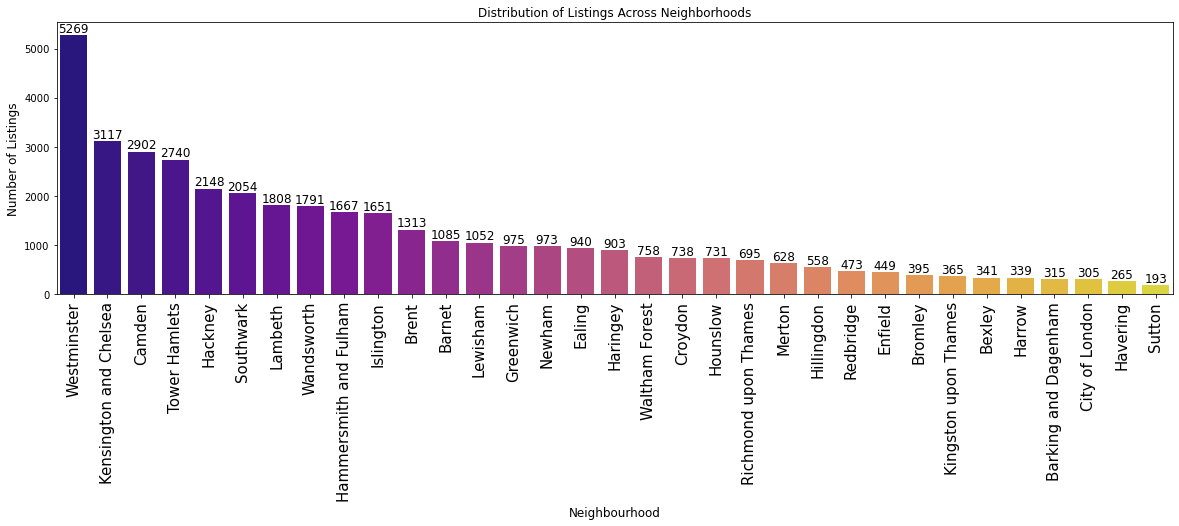

In [21]:
#Listings across neighborhoods

plt.figure(figsize=(20, 5))

labels_1 = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index,palette="plasma")

# Add count labels to each bar
for p in labels_1.patches:
    labels_1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black',fontsize=12)

plt.xticks(rotation=90,fontsize=15)
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Neighbourhood',fontsize=12)
plt.ylabel('Number of Listings',fontsize=12)
plt.show()

In [22]:
print('''Top 3 most saturared neighborhoods:
-Westminster
-Tower Hamlets
-Hackney

It would be interesting to consider neighbourhoods in the middle range (under 2000 properties) for business opportunities:
-Brent
-Lewisham
-Haringey
-Barnet
-Ealing
-Greenwich
-Waltham Forest
-Richmond Upon Thames
-Kingston Upon Thames''')

Top 3 most saturared neighborhoods:
-Westminster
-Tower Hamlets
-Hackney

It would be interesting to consider neighbourhoods in the middle range (under 2000 properties) for business opportunities:
-Brent
-Lewisham
-Haringey
-Barnet
-Ealing
-Greenwich
-Waltham Forest
-Richmond Upon Thames
-Kingston Upon Thames


Visualisation 2: What is the most expensive neighbourhood?

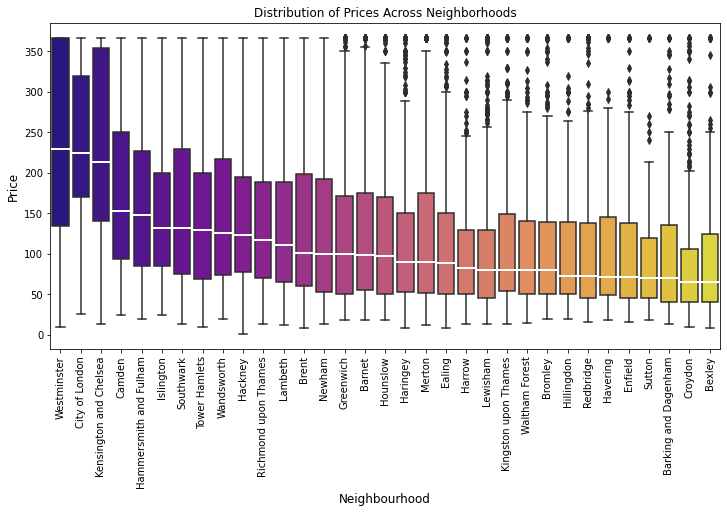

In [23]:
# Create a boxplot to visualize the distribution of prices across neighborhoods

# Set the color for the median line
medianprops = dict(linewidth=2, color='white')

plt.figure(figsize=(12, 6))

labels_2 = sns.boxplot(x='neighbourhood', y='price', data=df, order=df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).index,palette="plasma",medianprops=medianprops)

# Add count labels to each bar
for p in labels_2.patches:
    labels_2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black',fontsize=12)


plt.xticks(rotation=90)
plt.title('Distribution of Prices Across Neighborhoods')
plt.xlabel('Neighbourhood',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

In [24]:
print('''The top 3 most expensive neighbourhoods are:
-City of London
-Kensington and Chelsea
-Westminster

The majority of neighborhoods' data present potential outliers far away from the median and interquartile range. An interesting group of neighborhoods with median price per night ranging between 90£-125£ excluding the most saturated ones are:
-Richmond upon Thames
-Islington
-Wandsworth
-Merton
-Brent
-Houslow
-Greenwich
-Barnet
-Kingston Upon Thames''')

The top 3 most expensive neighbourhoods are:
-City of London
-Kensington and Chelsea
-Westminster

The majority of neighborhoods' data present potential outliers far away from the median and interquartile range. An interesting group of neighborhoods with median price per night ranging between 90£-125£ excluding the most saturated ones are:
-Richmond upon Thames
-Islington
-Wandsworth
-Merton
-Brent
-Houslow
-Greenwich
-Barnet
-Kingston Upon Thames


Visualisation 3: Average price per neighbourhood

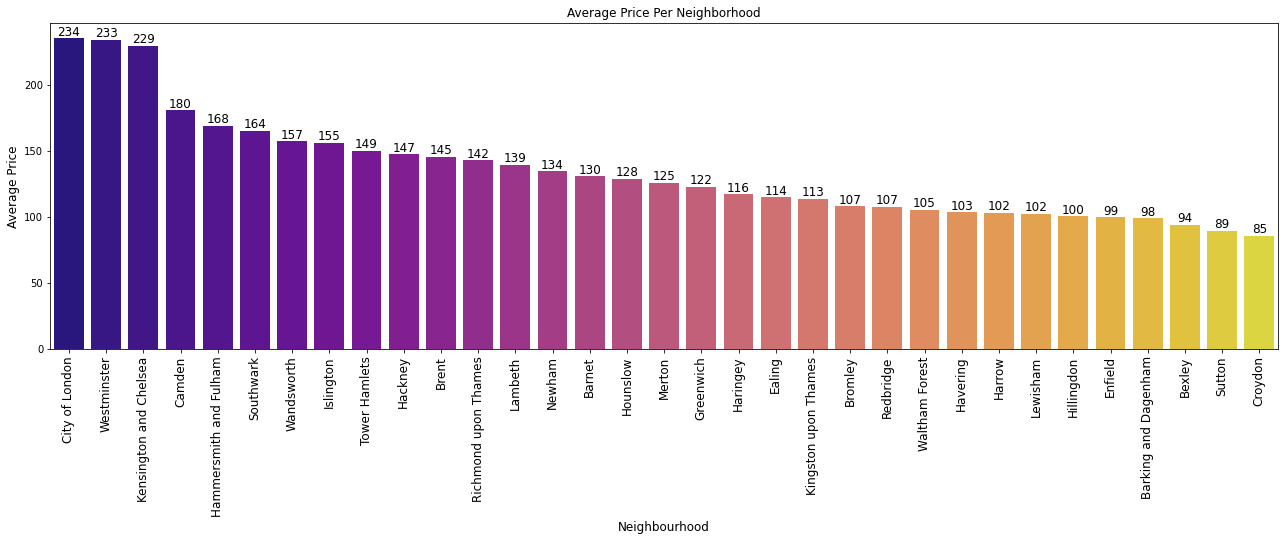

In [25]:
# Calculate the average price per neighborhood
avg_price_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Plot the average price per neighborhood
plt.figure(figsize=(22, 6))

labels_3 = sns.barplot(x=avg_price_neighborhood.index, y=avg_price_neighborhood.values,palette="plasma")

# Add count labels to each bar
for p in labels_3.patches:
    labels_3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black',fontsize=12)


plt.xticks(rotation=90,fontsize=12)
plt.title('Average Price Per Neighborhood')
plt.xlabel('Neighbourhood',fontsize=12)
plt.ylabel('Average Price',fontsize=12)
plt.show()

In [26]:
print('''Top 3 average price per neighbourhood around 230£:
-City of London
-Kensington and Chelsea
-Westminster

The average price in all other neighbourhoods drops from 180£ to 85£''')

Top 3 average price per neighbourhood around 230£:
-City of London
-Kensington and Chelsea
-Westminster

The average price in all other neighbourhoods drops from 180£ to 85£


Visualisation 4: What is the most popular room type overall

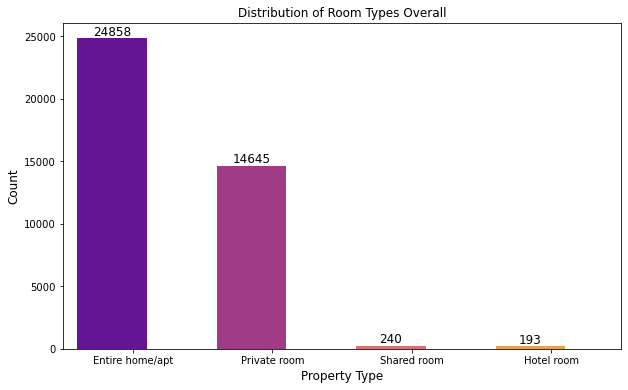

In [27]:
# Calculate the distribution of room types
room_type_distribution = df['room_type'].value_counts()

# Plot a bar chart to visualize the distribution of room types
plt.figure(figsize=(10, 6))

labels_4 = sns.barplot(x=room_type_distribution.index, y=room_type_distribution.values,palette="plasma")

bar_width = 0.5
# Add count labels to each bar
for p in labels_4.patches:
    p.set_width(bar_width)
    labels_4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black',fontsize=12)

plt.title('Distribution of Room Types Overall')
plt.xlabel('Property Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [28]:
print('''-Approx 63% of listings are Entire properties while almost 37% are private rooms within a property
-Shared rooms and Hotel rooms could be ignored in the analysis.''')

-Approx 63% of listings are Entire properties while almost 37% are private rooms within a property
-Shared rooms and Hotel rooms could be ignored in the analysis.


Visualisation 5:  What is the most popular room type per neighbourhood?

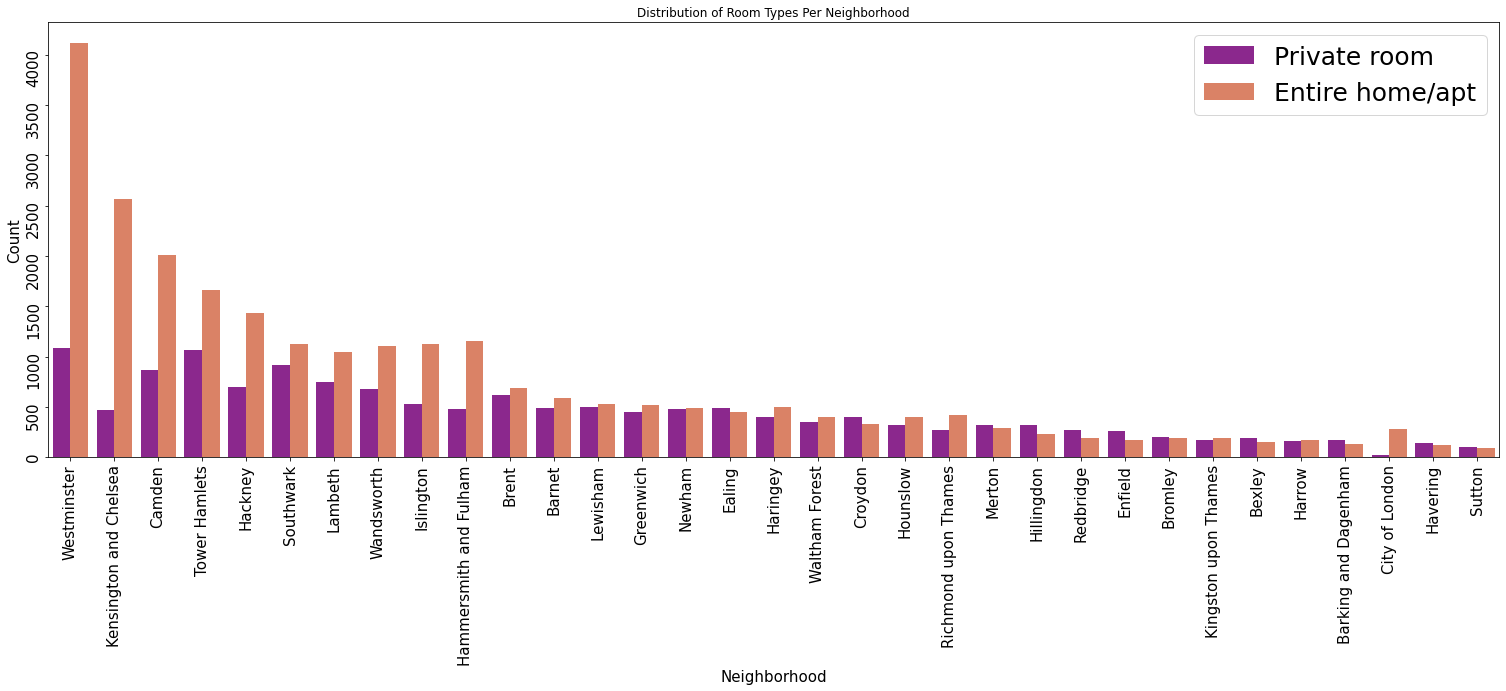

In [29]:
# Excluding 'Shared room' and 'Hotel room' from the DataFrame
df = df[df['room_type'].isin(['Entire home/apt', 'Private room'])]

# Create a grouped bar chart to visualize the distribution of room types per neighborhood
plt.figure(figsize=(26, 8))

labels_5 = sns.countplot(x='neighbourhood', hue='room_type', data=df, order=df['neighbourhood'].value_counts().index,palette="plasma")

plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=90, fontsize=15)
plt.title('Distribution of Room Types Per Neighborhood')
plt.xlabel('Neighborhood',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='upper right', fontsize=25)
plt.show()

This visual presents what type of listing is most popular per neighbourhood only considering Entire home vs Private Room where Entire Homes are more common in the most relevant neighbourhoods

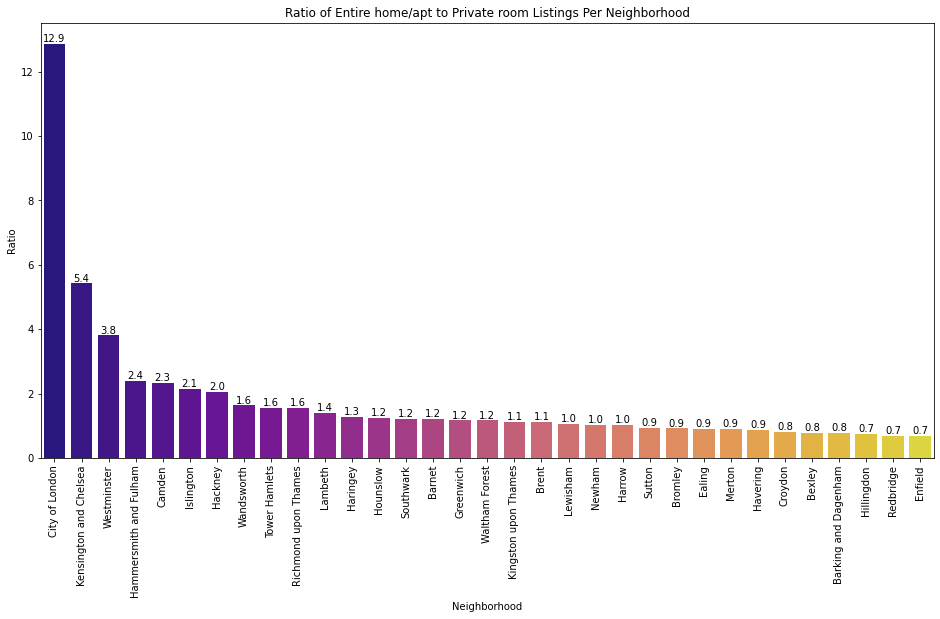

In [30]:
import math

# Calculate the counts of 'Entire home/apt' and 'Private room' listings per neighborhood
room_type_counts = df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Calculate the ratio of 'Entire home/apt' to 'Private room' listings
room_type_counts['ratio_entire_home_to_private'] = room_type_counts['Entire home/apt'] / room_type_counts['Private room']

# Sort the neighborhoods by the ratio in descending order
sorted_ratio = room_type_counts['ratio_entire_home_to_private'].sort_values(ascending=False).index

# Plot the ratio per neighborhood
plt.figure(figsize=(16, 8))

room_type_counts_labels = sns.barplot(x=room_type_counts.index, y='ratio_entire_home_to_private', data=room_type_counts, order=sorted_ratio, palette="plasma")

# Add count labels to each bar
for p in room_type_counts_labels.patches:
    room_type_counts_labels.annotate(f'{round(p.get_height(),1)}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black',fontsize=10)

plt.xticks(rotation=90)
plt.title('Ratio of Entire home/apt to Private room Listings Per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Ratio')
plt.show()

In [31]:
print('''This visual shows the ratio between Entire Homes and Private Rooms.

In the most expensive neighbourhoods:
-City of London
-Kensington and Chelsea
-Westminster

Private Rooms are rarer, and Entire Homes dominate the listings.

In all other neighbourhoods on London, their presence is quite even, therefore Entire Homes and Private Rooms might work as well.''')

This visual shows the ratio between Entire Homes and Private Rooms.

In the most expensive neighbourhoods:
-City of London
-Kensington and Chelsea
-Westminster

Private Rooms are rarer, and Entire Homes dominate the listings.

In all other neighbourhoods on London, their presence is quite even, therefore Entire Homes and Private Rooms might work as well.


Visualisation 6: What is the min night per room type overall?

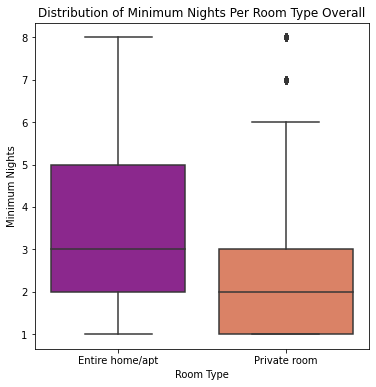

In [32]:
# Create a boxplot to visualize the distribution of minimum nights per room type
plt.figure(figsize=(6, 6))

# Calculate the median minimum nights for each room type
median_min_nights = df.groupby('room_type')['minimum_nights'].median().sort_values(ascending=False).index

sns.boxplot(x='room_type', y='minimum_nights', data=df, palette='plasma', showfliers=True, order=median_min_nights)


plt.title('Distribution of Minimum Nights Per Room Type Overall')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.show()

Even though Entire Homes are more expensive, the may be booked by groups, are more popular on the listings and are required to be booked by 3 nights median compared to 2 nights for the private rooms

Ranges are:
2 to 5 nights for Entire Homes
1 to 3 nights for Private Rooms

Room availability per neighbourhood

Analysis of availability


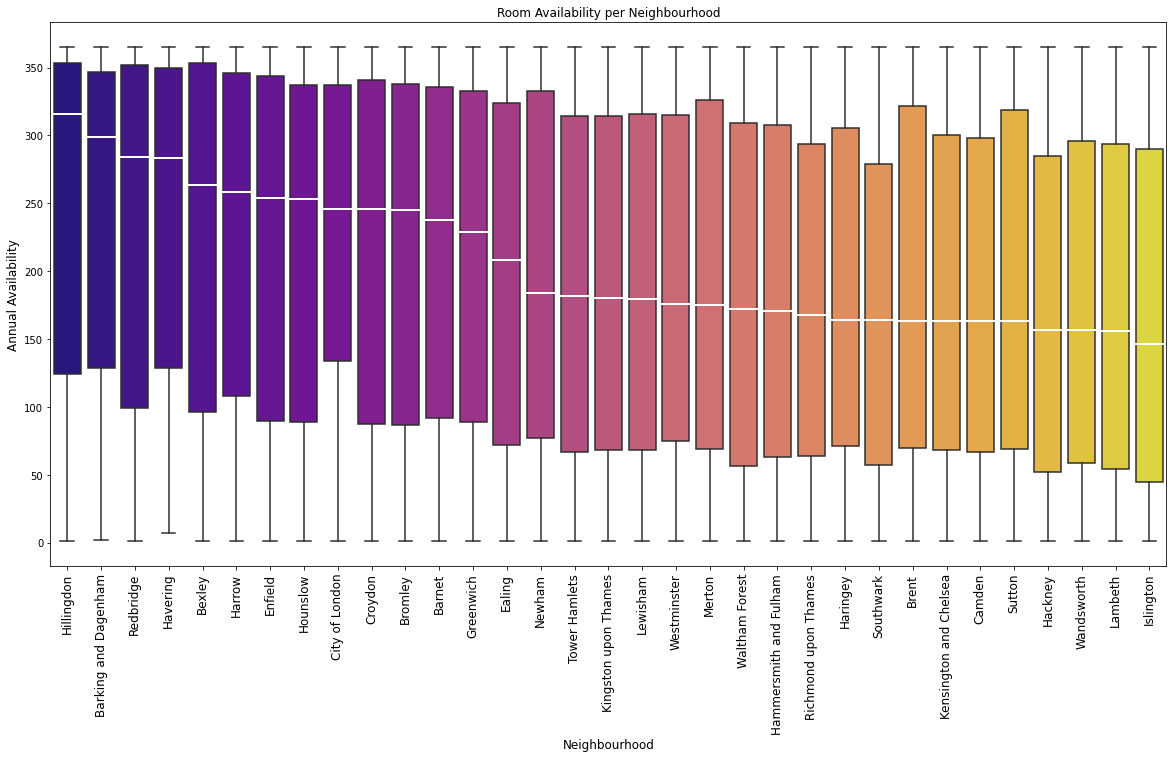

In [33]:
print("Analysis of availability")

sorted_df = df.groupby("neighbourhood")["availability_365"].median().sort_values(ascending=False).index

# Set the color for the median line
medianprops = dict(linewidth=2, color='white')

# Create a boxplot to visualize the distribution of availability_365 per neighborhood
plt.figure(figsize=(20, 10))
plot_av = sns.boxplot(data=df, x="neighbourhood", y="availability_365", palette='plasma', order=sorted_df,medianprops=medianprops)

plt.title('Room Availability per Neighbourhood')
plt.xticks(rotation=90,fontsize = 12)
plt.xlabel("Neighbourhood",fontsize = 12)
plt.ylabel("Annual Availability",fontsize = 12)
plt.show()

Neighbourhoods of interest with the most median availability:
-Harrow
-Enfield
-Hounslow
-Barnet
-Greenwich

Neighbourhoods of interest with least the median availability:
-Hackney
-Islington
-Lambeth
-Wandsworth

Listings on the map

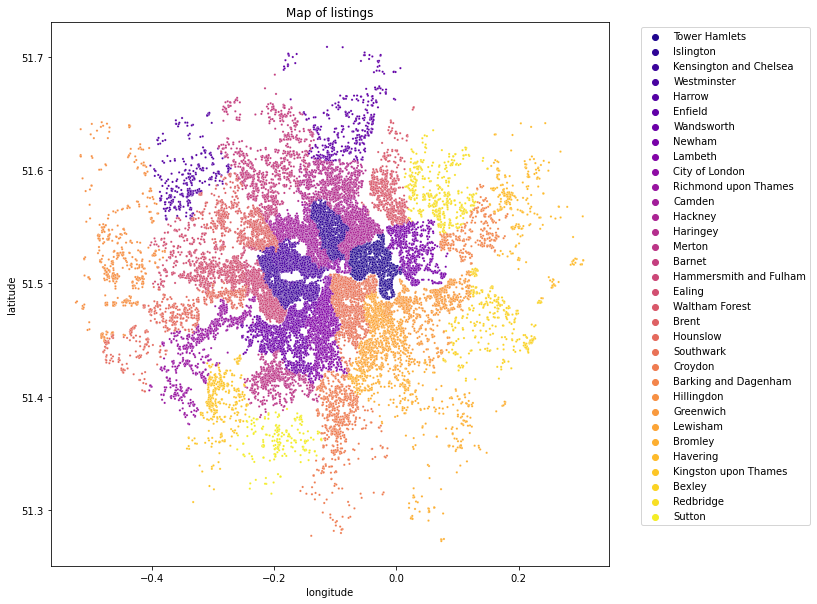

In [34]:
plt.figure(figsize=(10, 10))

plot_2 = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood, palette='plasma', s=5)

plt.title('Map of listings')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ioff()
plt.show()

This visual provides insights into the most saturated neighbourhoods in London where we can see that in the outer circle the listings are more spread out whereas the neighbourhoods within the inner circle have the largest supply of properties. 

Room types on the map

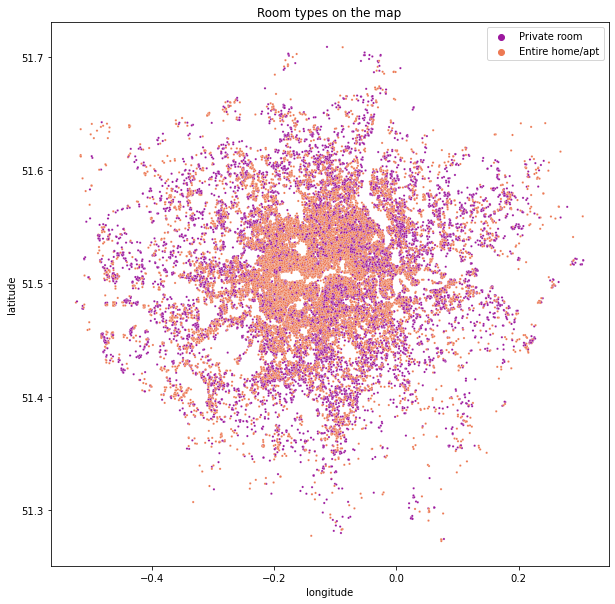

In [35]:
plt.figure(figsize=(10, 10))

plot_3 = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette='plasma', s=5)

plt.title('Room types on the map')
plt.legend(loc='upper right', fontsize=10)
plt.show()

This visual suggests a higher concentration of Entire Homes within the inner areas of the city and a more even distribution of Private room vs Entire Homes towards the outer areas of the city.

Correlation Analysis:

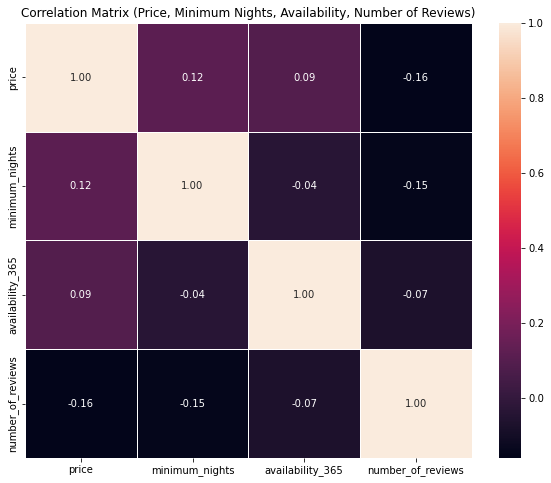

In [36]:
# Relevant columns for correlation analysis
selected_columns = ['price', 'minimum_nights', 'availability_365', 'number_of_reviews']

# Subset of the DataFrame with selected columns
selected_df = df[selected_columns]

# Compute correlation matrix
correlation_matrix = selected_df.corr()

# Display heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Price, Minimum Nights, Availability, Number of Reviews)')
plt.show()

In [37]:
print('''Negative correlation factors:

-Price vs Number of reviews. Higher-priced listings tend to receive fewer reviews.
-Minimum number of nights vs Number of reviews. Listings with longer minimum night stays tend to receive fewer reviews.
-Availability vs Number of reviews. Listings with higher availability tend to receive fewer reviews.
-Minimum number of nights vs Availability. Listings with longer minimum night stays tend to have lower availability.

Positive correlation factors:

-Price vs Availability. On average, higher-priced listings tend to have higher availability throughout the year.
-Price vs Minimum number of nights. On average, higher-priced listings tend to have longer minimum night stays.

None of the correlation factors stand out significantly. 
All of them are very low which suggests that there seems to be no relevant correlation between the variables analysed.''')

Negative correlation factors:

-Price vs Number of reviews. Higher-priced listings tend to receive fewer reviews.
-Minimum number of nights vs Number of reviews. Listings with longer minimum night stays tend to receive fewer reviews.
-Availability vs Number of reviews. Listings with higher availability tend to receive fewer reviews.
-Minimum number of nights vs Availability. Listings with longer minimum night stays tend to have lower availability.

Positive correlation factors:

-Price vs Availability. On average, higher-priced listings tend to have higher availability throughout the year.
-Price vs Minimum number of nights. On average, higher-priced listings tend to have longer minimum night stays.

None of the correlation factors stand out significantly. 
All of them are very low which suggests that there seems to be no relevant correlation between the variables analysed.


#Exploring Temporal Patterns

1. Seasonal Trends:
Analyse if there are seasonal trends in the data by grouping the data by months or other time intervals.

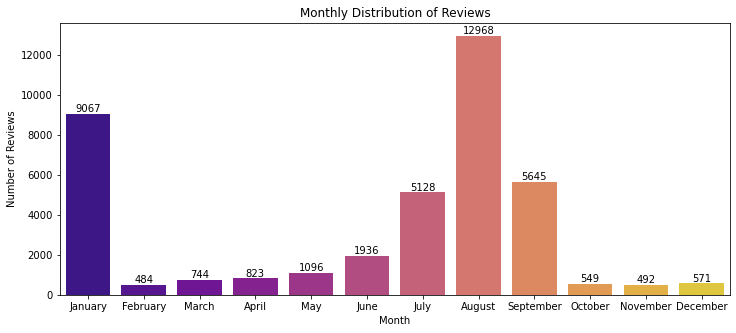

In [38]:
# Define the order of months
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Extract month from 'last_review'
df['month'] = df['last_review'].dt.month.map(month_mapping)

plt.figure(figsize=(12, 5))

# Create a bar plot using Seaborn
labels6 = sns.countplot(x='month', data=df, palette='plasma', order=month_mapping.values())

# Add count labels to each bar
for p in labels6.patches:
    labels6.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('Monthly Distribution of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

This visual shows the seasonality regarding customers reviews suggesting that the months with the most bookings are January after Christmas and August in Summer time.

2. Availability Over Time:
Explore how availability changes over time.

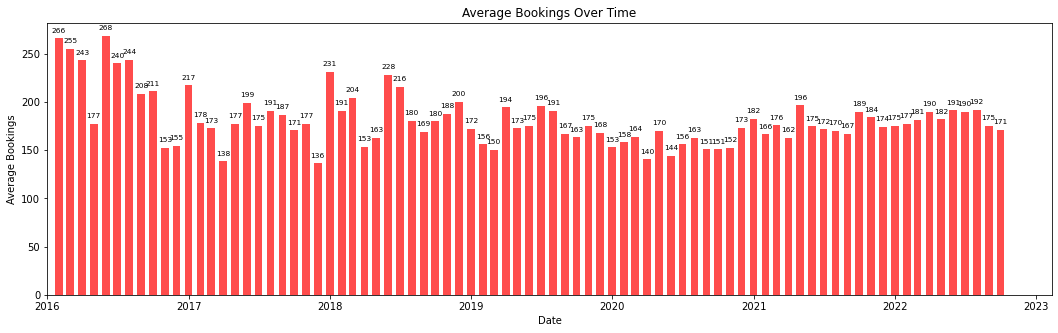

In [39]:
# Filter data to include records from 2017 onwards
df_reviews_overtime = df[df['last_review'].dt.year >= 2016]

# Resample data to monthly frequency and calculate average availability
average_bookings = df_reviews_overtime.set_index('last_review').resample('M')['availability_365'].mean()

# Set a wider bar width
bar_width = 20

# Plot as a bar chart with wider bars
plt.figure(figsize=(18, 5))
plt.bar(average_bookings.index, average_bookings, width=bar_width, color='red', alpha=0.7)

# Add labels to the top of the bars
for date, value in average_bookings.items():
    plt.text(date, value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=7.5)

plt.title('Average Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Bookings')
plt.xlim(pd.Timestamp('2016-01-01'))
plt.show()

The average monthly availability of properties follows a seasonal behaviour month-by-month confirming the seasonality seen on the previous graph.

Financial Estimates: Now we are going to look into renevue estimates per stay and per month and how this is distributed across neighbourhoods

In [40]:
print('''Calculated:
average Price per night,
average minimum nights per stay,
average availability per year
per room type per each neighbourhood''')
print(" ")
print(" ")

# Calculate average price per night for entire homes and private rooms in each neighborhood
avg_price_neighborhood = df.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()
avg_price_neighborhood['price'] = avg_price_neighborhood['price'].round(0).astype(int)

# Calculate average minimum nights for entire homes and private rooms in each neighborhood
avg_nights_neighborhood = df.groupby(['neighbourhood', 'room_type'])['minimum_nights'].mean().reset_index()
avg_nights_neighborhood['minimum_nights'] = avg_nights_neighborhood['minimum_nights'].round(0).astype(int)

# Calculate the average number of days available per year in each neighborhood
avg_days_neighborhood = df.groupby(['neighbourhood', 'room_type'])['availability_365'].mean().reset_index()
avg_days_neighborhood['availability_365'] = avg_days_neighborhood['availability_365'].round(0).astype(int)

Calculated:
average Price per night,
average minimum nights per stay,
average availability per year
per room type per each neighbourhood
 
 


In [41]:
print("Merged all three dataframes") 

# Merge average figures Dataframes:
merge_part = pd.merge(avg_price_neighborhood,avg_nights_neighborhood, on=['neighbourhood','room_type'])

neighborhood_figures = pd.merge(merge_part,avg_days_neighborhood, on=['neighbourhood','room_type'])


neighborhood_figures.head()

Merged all three dataframes


,neighbourhood,room_type,price,minimum_nights,availability_365
0,Barking and Dagenham,Entire home/apt,147,3,246
1,Barking and Dagenham,Private room,61,3,234
2,Barnet,Entire home/apt,164,4,218
3,Barnet,Private room,90,2,211
4,Bexley,Entire home/apt,145,3,236


In [42]:
print('''Calculated:
-Average revenue per year
-Average renevue per month
using avg price x avg days available per year''')

# Calculate average revenue per year and per month using avg price x avg days available per year
neighborhood_figures['revenue_per_year'] = (neighborhood_figures['price'] * neighborhood_figures['availability_365']).round(0).astype(int)
neighborhood_figures['revenue_per_month'] = (neighborhood_figures['revenue_per_year'] / 12).round(0).astype(int)

neighborhood_figures.head()

Calculated:
-Average revenue per year
-Average renevue per month
using avg price x avg days available per year


,neighbourhood,room_type,price,minimum_nights,availability_365,revenue_per_year,revenue_per_month
0,Barking and Dagenham,Entire home/apt,147,3,246,36162,3014
1,Barking and Dagenham,Private room,61,3,234,14274,1190
2,Barnet,Entire home/apt,164,4,218,35752,2979
3,Barnet,Private room,90,2,211,18990,1582
4,Bexley,Entire home/apt,145,3,236,34220,2852


In [43]:
print('''Calculated: 
-Average revenue per stay using avg price x avg minimum nights
-Estimated Bookings per year''')

# Calculate average revenue per stay using avg price x avg minimum nights
neighborhood_figures['revenue_per_stay'] = (neighborhood_figures['price'] * neighborhood_figures['minimum_nights']).round(0).astype(int)
neighborhood_figures['estimated_bookings_year'] = (neighborhood_figures['revenue_per_year'] / neighborhood_figures['revenue_per_stay']).round(0).astype(int)

neighborhood_figures.sample(4)

Calculated: 
-Average revenue per stay using avg price x avg minimum nights
-Estimated Bookings per year


,neighbourhood,room_type,price,minimum_nights,availability_365,revenue_per_year,revenue_per_month,revenue_per_stay,estimated_bookings_year
52,Richmond upon Thames,Entire home/apt,185,4,171,31635,2636,740,43
35,Hounslow,Private room,60,2,214,12840,1070,120,107
26,Haringey,Entire home/apt,160,4,174,27840,2320,640,44
46,Merton,Entire home/apt,193,4,172,33196,2766,772,43


Estimated Revenue per Year for Entire home/apt:


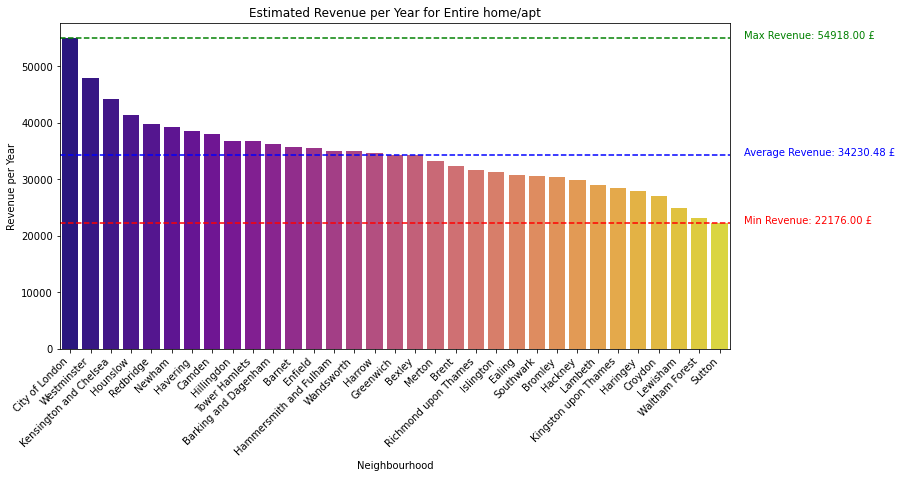

Estimated Revenue per Year for Private room:


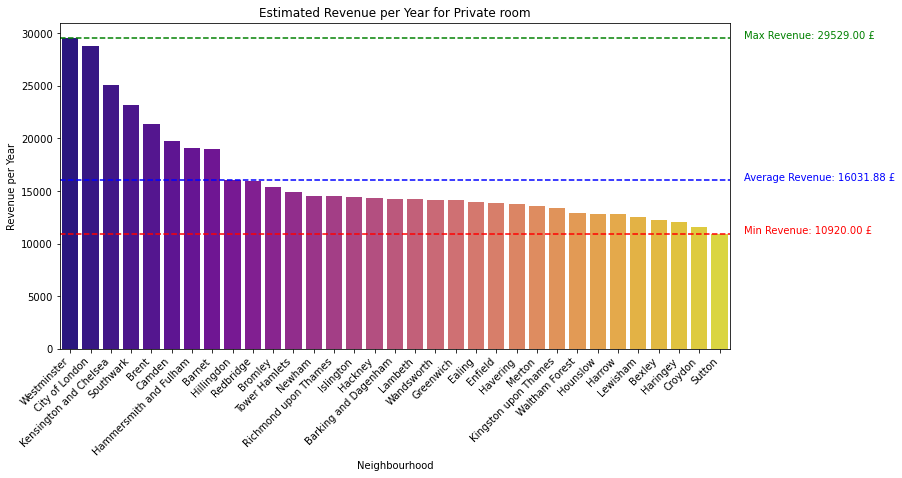

In [44]:
#Plots: Revenue per Year:

print("Estimated Revenue per Year for Entire home/apt:")

plt.figure(figsize=(12, 6))

entire_home_year = neighborhood_figures[neighborhood_figures['room_type'] == 'Entire home/apt']
entire_home_year = entire_home_year.sort_values(by='revenue_per_year',ascending=False)

sns.barplot(x='neighbourhood', y='revenue_per_year', data=entire_home_year, palette='plasma')

#Adding lines to the plot:
max_revenue_entire_home_year = entire_home_year['revenue_per_year'].max()
avg_revenue_entire_home_year = entire_home_year['revenue_per_year'].mean()
min_revenue_entire_home_year = entire_home_year['revenue_per_year'].min()

plt.axhline(max_revenue_entire_home_year, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_entire_home_year, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_entire_home_year, color='red', linestyle='--', label='Min Revenue')

plt.text(len(entire_home_year) + 0.2, max_revenue_entire_home_year, f'Max Revenue: {max_revenue_entire_home_year:.2f} £', color='green')
plt.text(len(entire_home_year) + 0.2, avg_revenue_entire_home_year, f'Average Revenue: {avg_revenue_entire_home_year:.2f} £', color='blue')
plt.text(len(entire_home_year) + 0.2, min_revenue_entire_home_year, f'Min Revenue: {min_revenue_entire_home_year:.2f} £', color='red')

plt.title('Estimated Revenue per Year for Entire home/apt')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Year')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Estimated Revenue per Year for Private room:")

plt.figure(figsize=(12, 6))

private_room_year = neighborhood_figures[neighborhood_figures['room_type'] == 'Private room']
private_room_year = private_room_year.sort_values(by='revenue_per_year',ascending=False)

sns.barplot(x='neighbourhood', y='revenue_per_year', data=private_room_year, palette='plasma')

#Adding lines to the plot:
max_revenue_private_room_year = private_room_year['revenue_per_year'].max()
avg_revenue_private_room_year = private_room_year['revenue_per_year'].mean()
min_revenue_private_room_year = private_room_year['revenue_per_year'].min()

plt.axhline(max_revenue_private_room_year, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_private_room_year, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_private_room_year, color='red', linestyle='--', label='Min Revenue')

plt.text(len(private_room_year) + 0.2, max_revenue_private_room_year, f'Max Revenue: {max_revenue_private_room_year:.2f} £', color='green')
plt.text(len(private_room_year) + 0.2, avg_revenue_private_room_year, f'Average Revenue: {avg_revenue_private_room_year:.2f} £', color='blue')
plt.text(len(private_room_year) + 0.2, min_revenue_private_room_year, f'Min Revenue: {min_revenue_private_room_year:.2f} £', color='red')

plt.title('Estimated Revenue per Year for Private room')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Year')
plt.xticks(rotation=45, ha='right')
plt.show()

Estimated Revenue per Month for Entire home/apt:


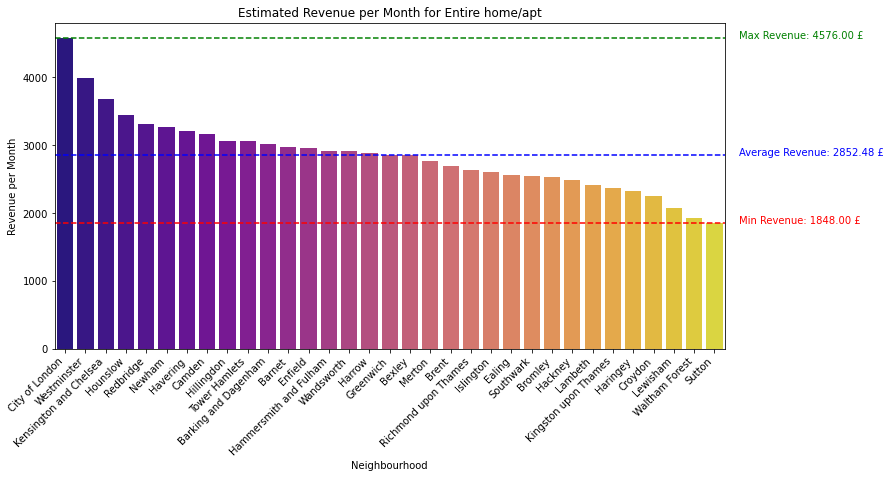

Estimated Revenue per Month for Private room:


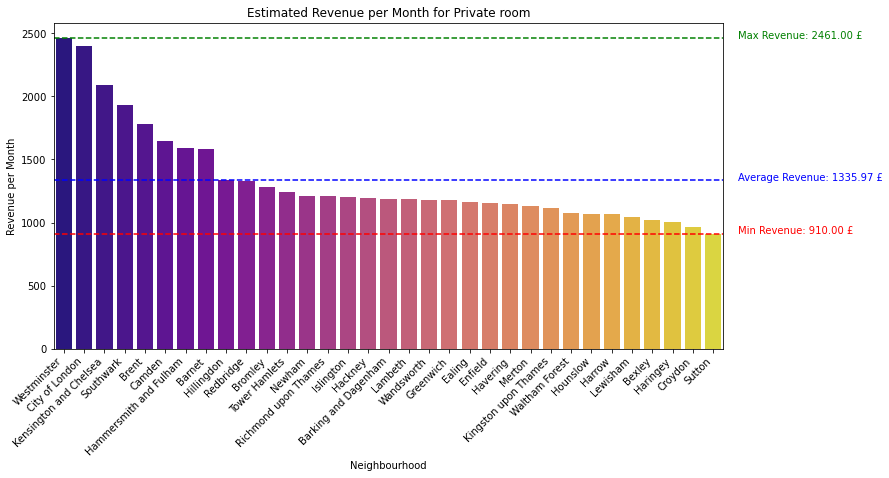

In [45]:
#Plots: Revenue per Month:

print("Estimated Revenue per Month for Entire home/apt:")

plt.figure(figsize=(12, 6))


entire_home_month = neighborhood_figures[neighborhood_figures['room_type'] == 'Entire home/apt']
entire_home_month = entire_home_month.sort_values(by='revenue_per_month',ascending=False)


sns.barplot(x='neighbourhood', y='revenue_per_month', data=entire_home_month, palette='plasma')

#Adding lines to the plot:
max_revenue_entire_home_month = entire_home_month['revenue_per_month'].max()
avg_revenue_entire_home_month = entire_home_month['revenue_per_month'].mean()
min_revenue_entire_home_month = entire_home_month['revenue_per_month'].min()

plt.axhline(max_revenue_entire_home_month, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_entire_home_month, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_entire_home_month, color='red', linestyle='--', label='Min Revenue')

plt.text(len(entire_home_month) + 0.2, max_revenue_entire_home_month, f'Max Revenue: {max_revenue_entire_home_month:.2f} £', color='green')
plt.text(len(entire_home_month) + 0.2, avg_revenue_entire_home_month, f'Average Revenue: {avg_revenue_entire_home_month:.2f} £', color='blue')
plt.text(len(entire_home_month) + 0.2, min_revenue_entire_home_month, f'Min Revenue: {min_revenue_entire_home_month:.2f} £', color='red')

plt.title('Estimated Revenue per Month for Entire home/apt')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Month')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Estimated Revenue per Month for Private room:")

plt.figure(figsize=(12, 6))


private_room_month = neighborhood_figures[neighborhood_figures['room_type'] == 'Private room']
private_room_month = private_room_month.sort_values(by='revenue_per_month',ascending=False)

sns.barplot(x='neighbourhood', y='revenue_per_month', data=private_room_month, palette='plasma')

#Adding lines to the plot:
max_revenue_private_room_month = private_room_month['revenue_per_month'].max()
avg_revenue_private_room_month = private_room_month['revenue_per_month'].mean()
min_revenue_private_room_month = private_room_month['revenue_per_month'].min()

plt.axhline(max_revenue_private_room_month, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_private_room_month, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_private_room_month, color='red', linestyle='--', label='Min Revenue')

plt.text(len(private_room_month) + 0.2, max_revenue_private_room_month, f'Max Revenue: {max_revenue_private_room_month:.2f} £', color='green')
plt.text(len(private_room_month) + 0.2, avg_revenue_private_room_month, f'Average Revenue: {avg_revenue_private_room_month:.2f} £', color='blue')
plt.text(len(private_room_month) + 0.2, min_revenue_private_room_month, f'Min Revenue: {min_revenue_private_room_month:.2f} £', color='red')

plt.title('Estimated Revenue per Month for Private room')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Month')
plt.xticks(rotation=45, ha='right')
plt.show()


Estimated Revenue per Stay for Entire home/apt:


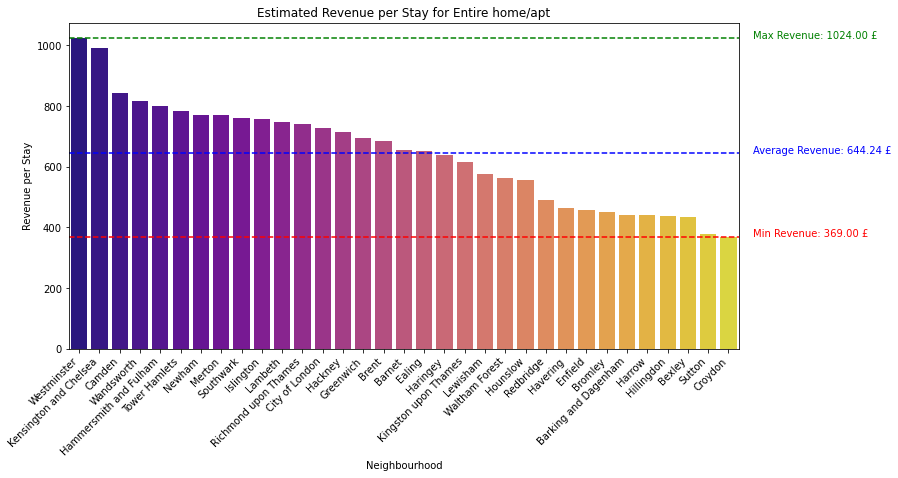

Estimated Revenue per Stay for Private room:


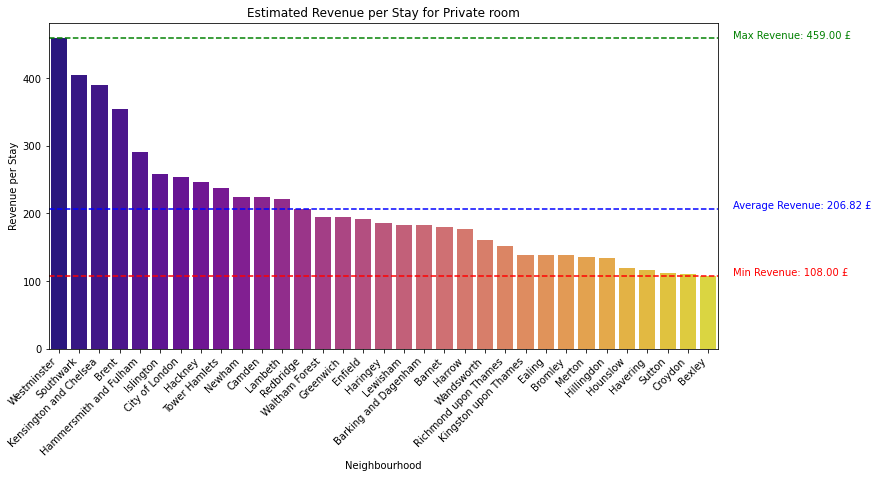

In [46]:
#Plots: Revenue per Stay:

print("Estimated Revenue per Stay for Entire home/apt:")

plt.figure(figsize=(12, 6))

entire_home_stay = neighborhood_figures[neighborhood_figures['room_type'] == 'Entire home/apt']
entire_home_stay = entire_home_stay.sort_values(by='revenue_per_stay',ascending=False)

sns.barplot(x='neighbourhood', y='revenue_per_stay', data=entire_home_stay, palette='plasma')

#Adding lines to the plot:
max_revenue_entire_home_stay = entire_home_stay['revenue_per_stay'].max()
avg_revenue_entire_home_stay = entire_home_stay['revenue_per_stay'].mean()
min_revenue_entire_home_stay = entire_home_stay['revenue_per_stay'].min()

plt.axhline(max_revenue_entire_home_stay, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_entire_home_stay, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_entire_home_stay, color='red', linestyle='--', label='Min Revenue')

plt.text(len(entire_home_stay) + 0.2, max_revenue_entire_home_stay, f'Max Revenue: {max_revenue_entire_home_stay:.2f} £', color='green')
plt.text(len(entire_home_stay) + 0.2, avg_revenue_entire_home_stay, f'Average Revenue: {avg_revenue_entire_home_stay:.2f} £', color='blue')
plt.text(len(entire_home_stay) + 0.2, min_revenue_entire_home_stay, f'Min Revenue: {min_revenue_entire_home_stay:.2f} £', color='red')

plt.title('Estimated Revenue per Stay for Entire home/apt')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Stay')
plt.xticks(rotation=45, ha='right')
plt.show()


print("Estimated Revenue per Stay for Private room:")

plt.figure(figsize=(12, 6))

private_room_stay = neighborhood_figures[neighborhood_figures['room_type'] == 'Private room']
private_room_stay = private_room_stay.sort_values(by='revenue_per_stay',ascending=False)

sns.barplot(x='neighbourhood', y='revenue_per_stay', data=private_room_stay, palette='plasma')

#Adding lines to the plot:
max_revenue_private_room_stay = private_room_stay['revenue_per_stay'].max()
avg_revenue_private_room_stay = private_room_stay['revenue_per_stay'].mean()
min_revenue_private_room_stay = private_room_stay['revenue_per_stay'].min()

plt.axhline(max_revenue_private_room_stay, color='green', linestyle='--', label='Max Revenue')
plt.axhline(avg_revenue_private_room_stay, color='blue', linestyle='--', label='Average Revenue')
plt.axhline(min_revenue_private_room_stay, color='red', linestyle='--', label='Min Revenue')

plt.text(len(private_room_stay) + 0.2, max_revenue_private_room_stay, f'Max Revenue: {max_revenue_private_room_stay:.2f} £', color='green')
plt.text(len(private_room_stay) + 0.2, avg_revenue_private_room_stay, f'Average Revenue: {avg_revenue_private_room_stay:.2f} £', color='blue')
plt.text(len(private_room_stay) + 0.2, min_revenue_private_room_stay, f'Min Revenue: {min_revenue_private_room_stay:.2f} £', color='red')


plt.title('Estimated Revenue per Stay for Private room')
plt.xlabel('Neighbourhood')
plt.ylabel('Revenue per Stay')
plt.xticks(rotation=45, ha='right')
plt.show()


Insights and Conclusions:

Insights:

Unique values suggest that:

-There are multiple hosts with multiple properties listed as total id is 69351 and total host_id is 45229
-There are 33 different neighbourhoods
-There are four different types of properties: Entire Home, Private Room, Shared Room, Hotel Room
-Shared Room, Hotel Room is not representative.

Top 3 most popular neighborhoods:

-Westminster
-Tower Hamlets
-Hackney

The top 3 most expensive neighbourhoods with an median price per night of 230£. These are:

-City of London
-Kensington and Chelsea
-Westminster

The majority of neighborhoods' data present potential outliers far away from the median and interquartile range. An interesting group of neighborhoods with median price per night excluding the most saturated ones are:

-Richmond upon Thames
-Islington
-Wandsworth
-Merton
-Brent
-Houslow
-Greenwich
-Barnet
-Kingston Upon Thames

Most popular property type advertised:

-Approx 60% of listings are Entire Homes whereas almost 40% are private rooms within a property.
-Shared rooms and Hotel rooms were ignored in the analysis afterward as the market share was irrelevant.

Most popular property type per neighbourhood:

The visual presented what type of listing is most popular per neighbourhood only considering Entire home vs Private Room where Entire Homes are much more common in the vast majority of neighbourhoods.

The ratio between Entire Homes and Private Rooms is quite high in the most expensive neighbourhoods:

-City of London
-Kensington and Chelsea
-Westminster

whereas Private Rooms are rarer, and Entire Homes dominate the listings.

In all other neighbourhoods, their presence is quite even, therefore Entire Homes and Private Rooms might work as well.

Minimum nights required per property type:

Even though Entire Homes are more expensive, they may be booked by groups, are more popular on the listings and are required to be booked by 3 nights median compared to 2 nights for the private rooms

Ranges are:
2 to 5 nights for Entire Homes
1 to 3 nights for Private Rooms

Availability over the year:

Neighbourhoods of interest with the most median availability:
-Harrow
-Enfield
-Hounslow
-Barnet
-Greenwich

Neighbourhoods of interest with least the median availability:
-Hackney
-Islington
-Lambeth
-Wandsworth

The maps suggested that:

-the neighbourhoods within the inner circle have the largest supply of properties whereas in the outer circle the listings are more spread out. 
-a higher concentration of Entire Homes within the inner areas of the city and a larger number of Private room vs Entire Homes towards the outer areas of the city.

Correlation Matrix:

None of the correlation factors stand out significantly. All of them are very low which suggests that there seems to be no relevant correlation between the variables Price, Number of reviews, Minimum number of nights and Availability.

Trending patterns over time:

-The time series showed the seasonality regarding customers reviews suggesting that the months with the most bookings are January after Christmas and August in Summer time. The average available days confirm the seasonality as well.

-Financial Figures-Estimated Average Revenues:

Entire Home:
-Per year: 34,231£
-Per month: 2,853£
-Per stay: 645£

Private room:
-Per year: 16,031£
-Per month: 1,336£
-Per stay: 206£


Conclusions:

The most saturated and most expensive neighborhoods could be avoided for business opportunities.

Neighbourhoods of interest with least the median availability could provide potential opportunities.

The AirBnb business is a seasonal business. It might be worth looking into a combination of rental strategies between short-term and mid-term to increase revenues.

The Airbnb market has been growing significantly and will continue to be, unless any major changes in legislation, regulations or a disruption of customers behaviour occurs.

On average, Entire Homes could potentially bring in twice as much revenue compared to a Private Room.

Both property types could provide interesting business opportunities.

Renting a private room at home could bring a good extra income, as long as legislation and tenancy agreements allow.

Renting an Entire Home could bring a significant additional monthly income, although the level of commitment and automation of the operations would make it more or less passive income. It is worth looking into a specific cost-benefit analysis for the particual business case.

It is advisable looking into the gaps on the Map of listings to explore areas of the city where Airbnb properties are not offered including neighbourhoods in the middle range of number of listings:

-Brent
-Harrow
-Lewisham
-Haringey
-Barnet
-Ealing
-Greenwich
-Waltham Forest
-Richmond Upon Thames
-Kingston Upon Thames

The profitability of the business will ultimately depend on the costs and expenses of running the property which will be deducted from the calculated average revenues and could not be included in the analysis.